<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series Decomposition

_Authors:_

---

### Learning Objectives
 
#### Time Series Decomposition
**After this lesson, you will be able to:**
- Describe the different components of time series data (trend, seasonality, cyclical, and residual)
- Decompose time series data into trend, seasonality, cyclical, and residual components
- Plot the decomposed components of a time series
---  

### Lesson Guide

#### [Autocorrelation](#py_i)
TODO
- [](#)
----

# Time Series Decomposition

Let's decompose the German drugstore, Rossmann's time series data into its components. 

These data contains the daily sales made at the drugstore as well as whether a sale or holiday affected the sales data.

Because we are most interested in the Date column (which contains the date of sales for each store), we will make sure to process that as a `DateTime` type, and make it the index of our dataframe.

In [12]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0)

data = pd.read_csv('data/rossmann.csv', skipinitialspace=True, low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


There are over a million sales data points in this dataset, so for some simple EDA we will focus on just one store.

In [3]:
store1_data = data[data['Store'] == 1]
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


## `statsmodels` time series tools 

Statsmodels (the dev version), offers a wide variety of reliable time series analysis tools. We will start off by loading the autocorrelation and partial autocorrelation functions, as well as a function for decomposing time series.

In [5]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/nicholebennett/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Plot the raw data

We can look at the raw sales first. Let's filter the data to days that the store was open.

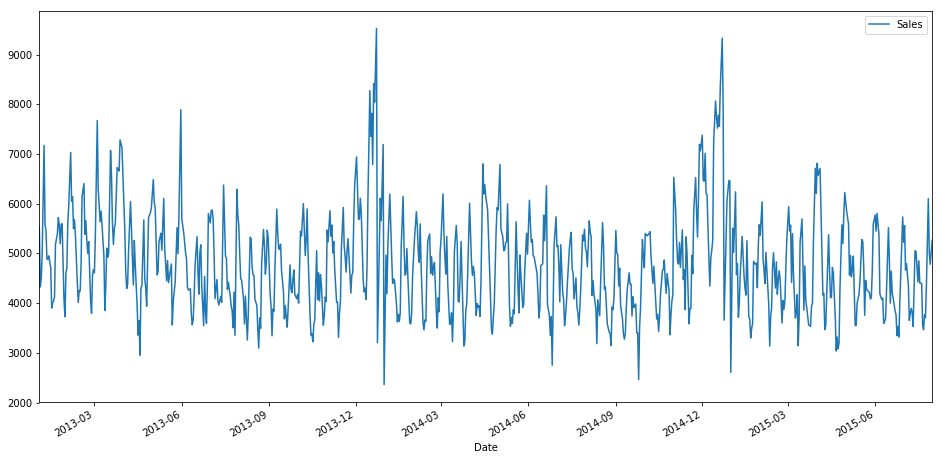

In [8]:
store1_open_data = store1_data[store1_data['Open']==1]
store1_open_data[['Sales']].plot()

## Decompose the time series and plot

Using the `seasonal_decompose()` function, we can break the time series into its constituent parts.

Use the function on the sales data with a frequency of 12, then plot the data.

Hint: The decomposition object from `seasonal_decompose()` has a `.plot()` function, like with Pandas DataFrames.

In [10]:
store1_data.dtypes

Store             int64
DayOfWeek         int64
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

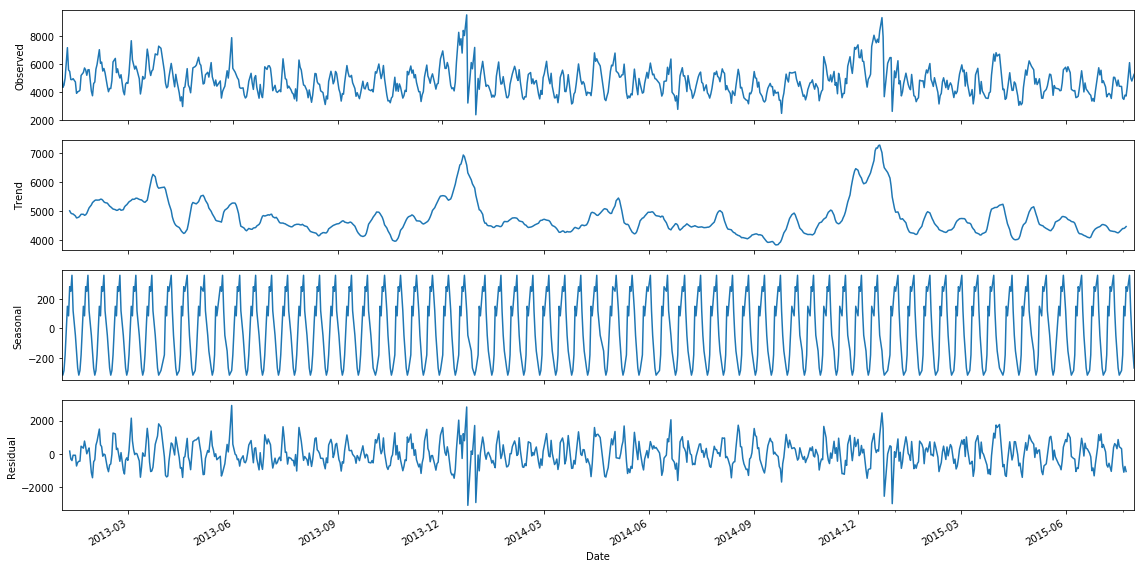

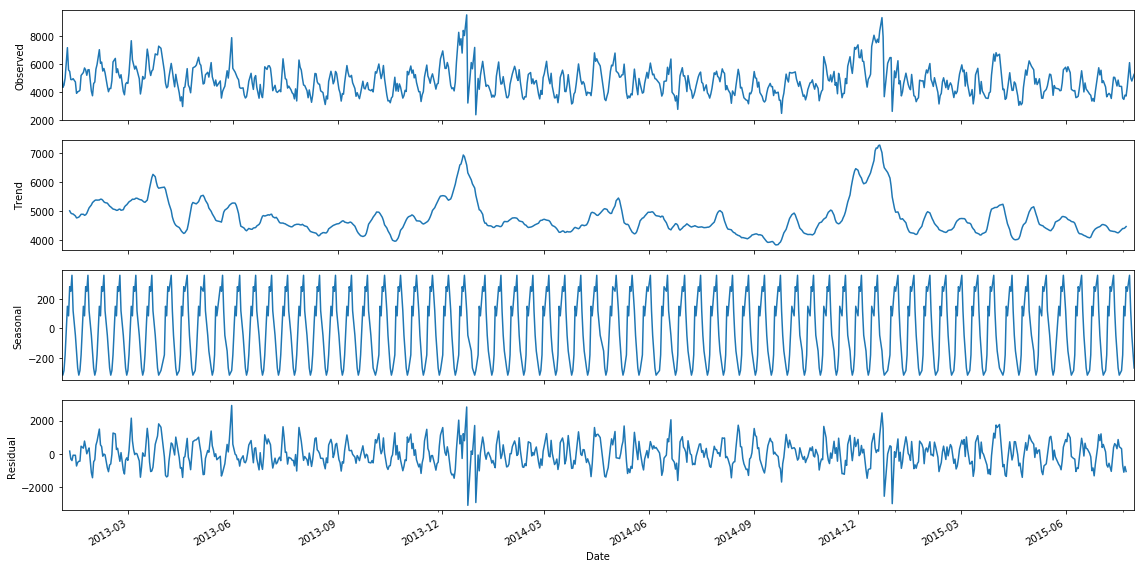

In [17]:
decomposition = seasonal_decompose(store1_open_data.Sales, freq=12)   
decomposition.plot()  

## Plot just the seasonal component

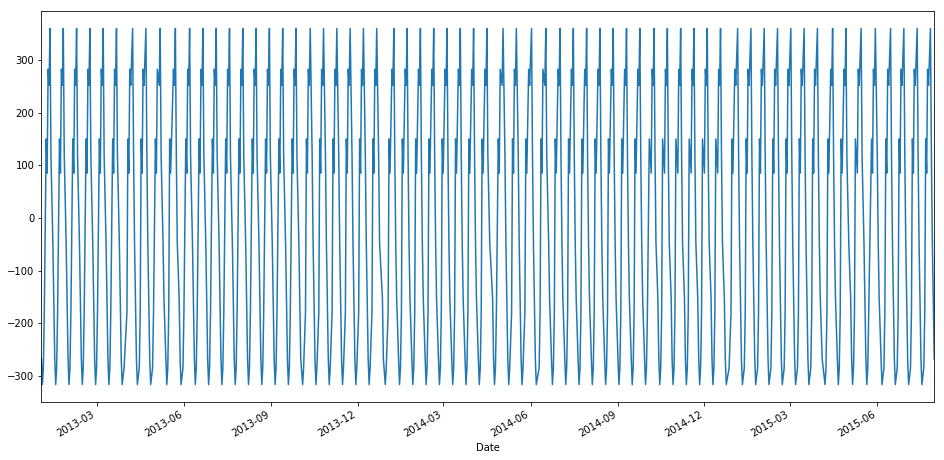

In [18]:
# Grab just one graphic doing the following:
seasonal = decomposition.seasonal 
seasonal.plot()